In [1]:
import urllib
import requests
from bs4 import BeautifulSoup
import pandas as pd

https://www.dell.com/community/Dell-Community/ct-p/English

Select a Product Forum...


https://www.dell.com/community/Servers/ct-p/ESServers


example post:

https://www.dell.com/community/PowerEdge-Hardware-General/PowerEdge-R730XD-Loading-BIOS-Drivers/m-p/7644944#M65318


- PowerEdge Hardware General: 19,579 posts
- https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW

Can filter by Solved (doesnt change url)



single post: https://www.dell.com/community/PowerEdge-Hardware-General/Upgrade-PERC-on-PowerEdge-R720/m-p/7502189#M63601

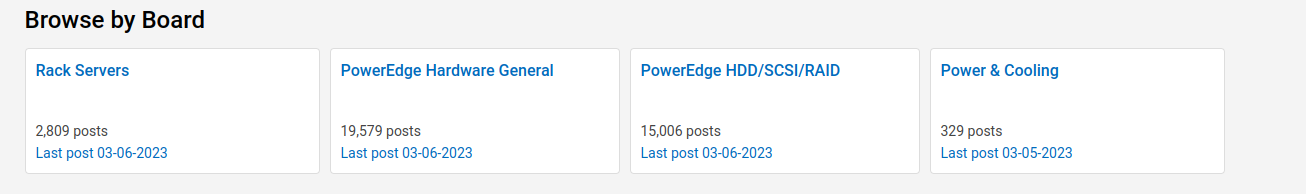


---------------


https://www.dell.com/community/PowerEdge-Hardware-General/T320-video-card-upgrade/m-p/4404427#M38256

https://www.dell.com/community/PowerEdge-Hardware-General/Impossible-to-update-Lifecycle-Dell-Poweredge-T130-through-FTP/m-p/7310257#M61223

https://www.dell.com/community/PowerEdge-Hardware-General/Upgrade-PERC-on-PowerEdge-R720/m-p/7502189#M63601

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}



# url = 'https://www.dell.com/community/PowerEdge-Hardware-General/PowerEdge-R730XD-Loading-BIOS-Drivers/m-p/7644944#M65318'
url = 'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW'
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')

print(soup.title.text)


	PowerEdge Hardware General - Dell Community



# Load More

In a URL, a hash mark, number sign, or pound sign ( `#` ) points a browser to a specific spot in a page or website. It is used to separate the URI of an object from a **fragment identifier.**

https://exeter-data-analytics.github.io/python-data/scraping.html


The fragment identifier is a string after URI, after the hash, which identifies something specific as a function of the document. For a user interface Web document such as HTML poage, it typically identifies a part or view. For example in the object

        ` http://foo/bar#frag`


Depending on where you look, the URI is considered to include the fragment identifier, or to have the fragment identifier appended to it.  This is important for the BNF, but in practice you will find people using the terms URI and URL loosely to things which do or do not include a possible fragment identifier. Formally, the URI does include the fragment ID (https://www.w3.org/DesignIssues/Fragment.html)

https://github.com/scrapy/scrapy/issues/4067 <- using scrapy `dont_filter=False`


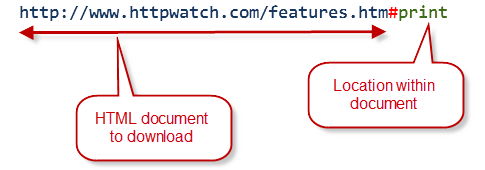!

https://blog.httpwatch.com/2011/03/01/6-things-you-should-know-about-fragment-urls/



If you try using fragment URLs in an HTTP sniffer like HttpWatch, you’ll never see the fragment IDs in the requested URL or Referer header. The reason is that the fragment identifier is only used by the browser – it doesn’t affect which resource is returned from the server.

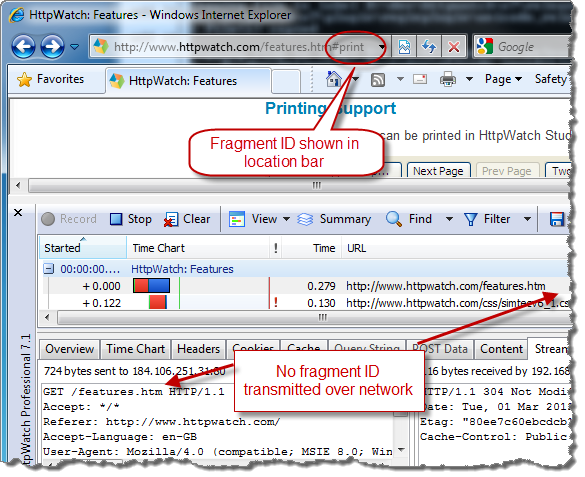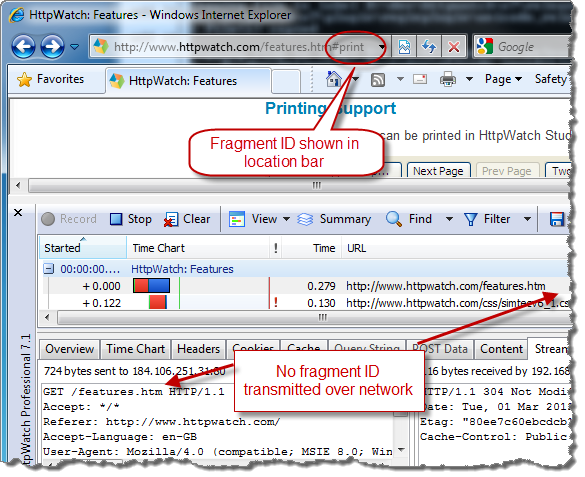


Changing A Fragment ID Doesn’t Reload a Page but Does Create History

# Selenium to Load More attempt

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


### error `chromedriver executable needs to be in PATH?`

Selenium needs chromedriver to be installed. Without it a generic exception will be raised


check its ninstalled in ` /usr/bin`

### Installation 
- https://sites.google.com/chromium.org/driver/
- https://medium.com/@priyanka.kolachina/install-google-chrome-and-chrome-driver-on-ubuntu-fdea61c0f132

https://github.com/InstaPy/InstaPy/issues/6648:

- It looks like you don't have the correct chromedriver if any installed. To fix this try this:
- Install the chromedriver onto your machine
- `sudo wget https://github.com/electron/electron/releases/download/v9.0.2/chromedriver-v9.0.2-linux-armv7l.zip`

- Unzip the file
- `sudo apt-get install unzip`
- `unzip chromedriver-v9.0.2-linux-armv7l.zip`

- Lastly, move the chromedriver onto your path, eg:
- `driver = webdriver.Chrome(‘/usr/lib/chromium-browser/chromedriver’) `<<example, don't do this exact line


-----------------

in addition:

```
sudo chown root:root /usr/bin/chromedriver
sudo chmod +x /usr/bin/chromedriver

```
Stoll have this error now: `OSError: [Errno 8] Exec format error: 'chromedriver'`


### I think my chrome is messed up (the browser) and cant update so will remove entirely and reinstall

- current: `Google Chrome 99.0.4844.84 
`

------------------
This can also mean that the chromedriver is installed but Selenium can't find it. To fix this the chromedriver location should be added to the `PATH `environment variable:

```
$ export PATH=$PATH:/location/where/chromedriver/is/
```

i.e., `export PATH=$PATH:/usr/lib/chromedriver/`

Alternatively, we can specify the driver directly in the Selenium initiation code:

```
from selenium import webdriver
driver = webdriver.Chrome(executable_path=r'your\path\chromedriver.exe')
driver.get('https://scrapfly.io/')

```

In [2]:
!export PATH=$PATH:/usr/lib/chromedriver/


`OSError: [Errno 8] Exec format error: 'chromedriver'`

deleted (https://stackoverflow.com/questions/57570005/delete-chromedriver-from-ubuntu) and reinstalled Chrome

`Chrome Version 111.0.5563.64 (Official Build) (64-bit)`


so getting matched driver: https://chromedriver.chromium.org/

and will remove curr `sudo rm -f /usr/bin/chromedriver`


when running `chromedriver -v` I get `cannot execute binary file: Exec format error
 ` error, so I dont think my driver is in correct format
 
 
 ** when downloading, may need to cd into folder itself to get the `chromedriver`
 
 
 - `sudo mv chromedriver /usr/bin/chromedriver`
 - test: `chromedriver --version`

# Test

In [4]:

def click_load_more(url):
    # Launch a headless Chrome browser
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    driver = webdriver.Chrome(options=options)

    # Load the webpage
    driver.get(url)
    print('webpage loaded')

    # Wait for the "load-more-solutions-wrapper" button to appear
    button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, '.load-more-solutions-wrapper'))
    )
    print('have waited for button to appear')

    # Click the button
    button.click()
    print('button clicked')

    # Wait for the page to finish loading
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, '.lia-quilt-row'))
    )
    print('waited for page to fully load')

    # Print the number of items loaded
    items = driver.find_elements(By.CSS_SELECTOR, '.lia-quilt-row')
    print(f'{len(items)} items loaded.')

    # Quit the browser
    driver.quit()

# Example usage
click_load_more('https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW')

webpage loaded


TimeoutException: Message: 
Stacktrace:
#0 0x562fb737a243 <unknown>
#1 0x562fb713e7a6 <unknown>
#2 0x562fb717b64d <unknown>
#3 0x562fb717b761 <unknown>
#4 0x562fb71b6da4 <unknown>
#5 0x562fb719c0ad <unknown>
#6 0x562fb71b4932 <unknown>
#7 0x562fb719be53 <unknown>
#8 0x562fb716e9ea <unknown>
#9 0x562fb716fb2e <unknown>
#10 0x562fb73ced5e <unknown>
#11 0x562fb73d2a80 <unknown>
#12 0x562fb73b48b0 <unknown>
#13 0x562fb73d3b63 <unknown>
#14 0x562fb73a5f75 <unknown>
#15 0x562fb73f6998 <unknown>
#16 0x562fb73f6b27 <unknown>
#17 0x562fb7411c23 <unknown>
#18 0x7fbaa6694b43 <unknown>


This script uses WebDriverWait and expected_conditions from Selenium's selenium.webdriver.support.ui module to wait until the "load-more-wrapper" button is clickable before clicking it. It then clicks the button twice to load more posts.

Finally, it uses find_elements to get all the a elements with an href attribute on the page, and prints the href attribute value for each one.

# Working Selenium v1

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up Selenium web driver (assuming you have already installed and set up Selenium)
driver = webdriver.Chrome()

# Navigate to the Dell community forum page
driver.get('https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW')

# Click the "load-more-wrapper" button twice to load more posts
load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, '.load-more-wrapper')))
load_more_button.click()
load_more_button.click()

# Get all href links on the page and print them
links = driver.find_elements(By.XPATH, '//a[@href]')
for link in links:
    print(link.get_attribute('href'))

# Close the Selenium web driver
driver.quit()


ElementClickInterceptedException: Message: element click intercepted: Element is not clickable at point (443, 1957)
  (Session info: chrome=111.0.5563.64)
Stacktrace:
#0 0x557da0f54243 <unknown>
#1 0x557da0d187a6 <unknown>
#2 0x557da0d5c48f <unknown>
#3 0x557da0d5a3e6 <unknown>
#4 0x557da0d57c9e <unknown>
#5 0x557da0d56d18 <unknown>
#6 0x557da0d4aa65 <unknown>
#7 0x557da0d76082 <unknown>
#8 0x557da0d4a2e3 <unknown>
#9 0x557da0d7624e <unknown>
#10 0x557da0d8e932 <unknown>
#11 0x557da0d75e53 <unknown>
#12 0x557da0d489ea <unknown>
#13 0x557da0d49b2e <unknown>
#14 0x557da0fa8d5e <unknown>
#15 0x557da0faca80 <unknown>
#16 0x557da0f8e8b0 <unknown>
#17 0x557da0fadb63 <unknown>
#18 0x557da0f7ff75 <unknown>
#19 0x557da0fd0998 <unknown>
#20 0x557da0fd0b27 <unknown>
#21 0x557da0febc23 <unknown>
#22 0x7f6577894b43 <unknown>



## Cookie button

- this is what I beleive to be the main issue, 
- 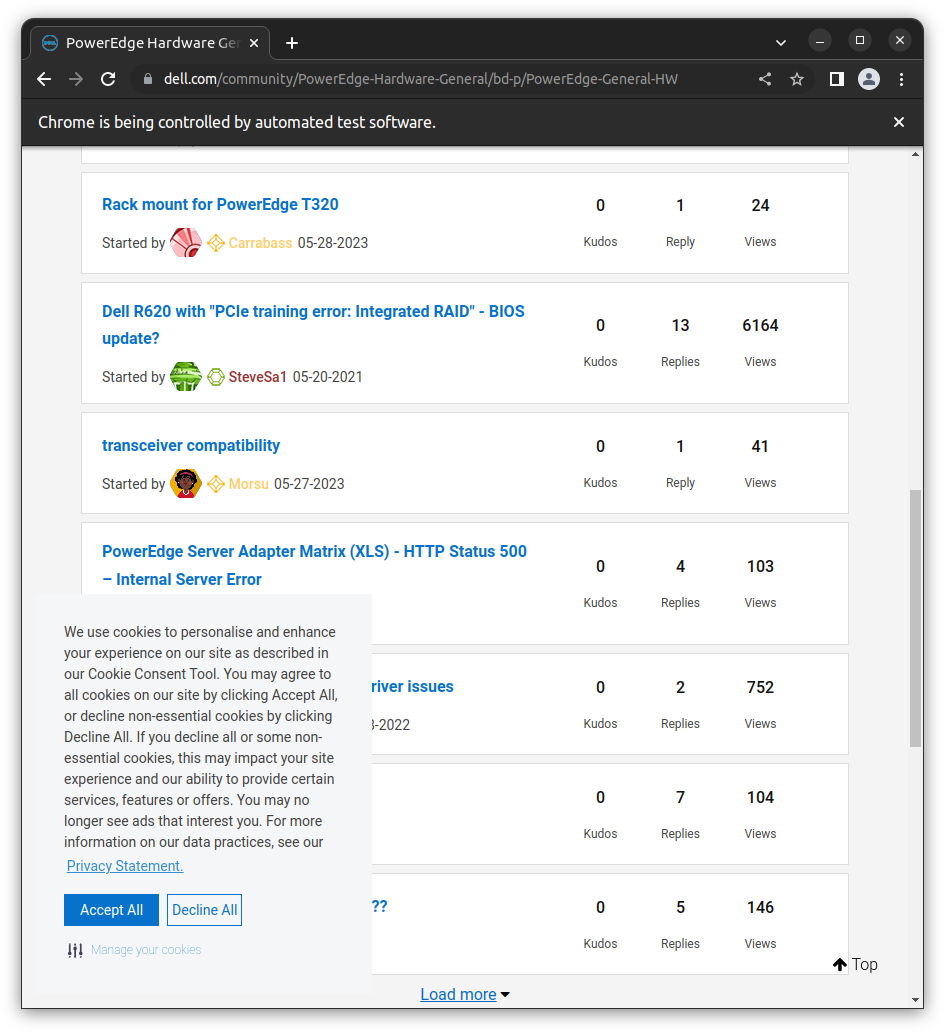
- lets find the element'c Class so we can click it
- 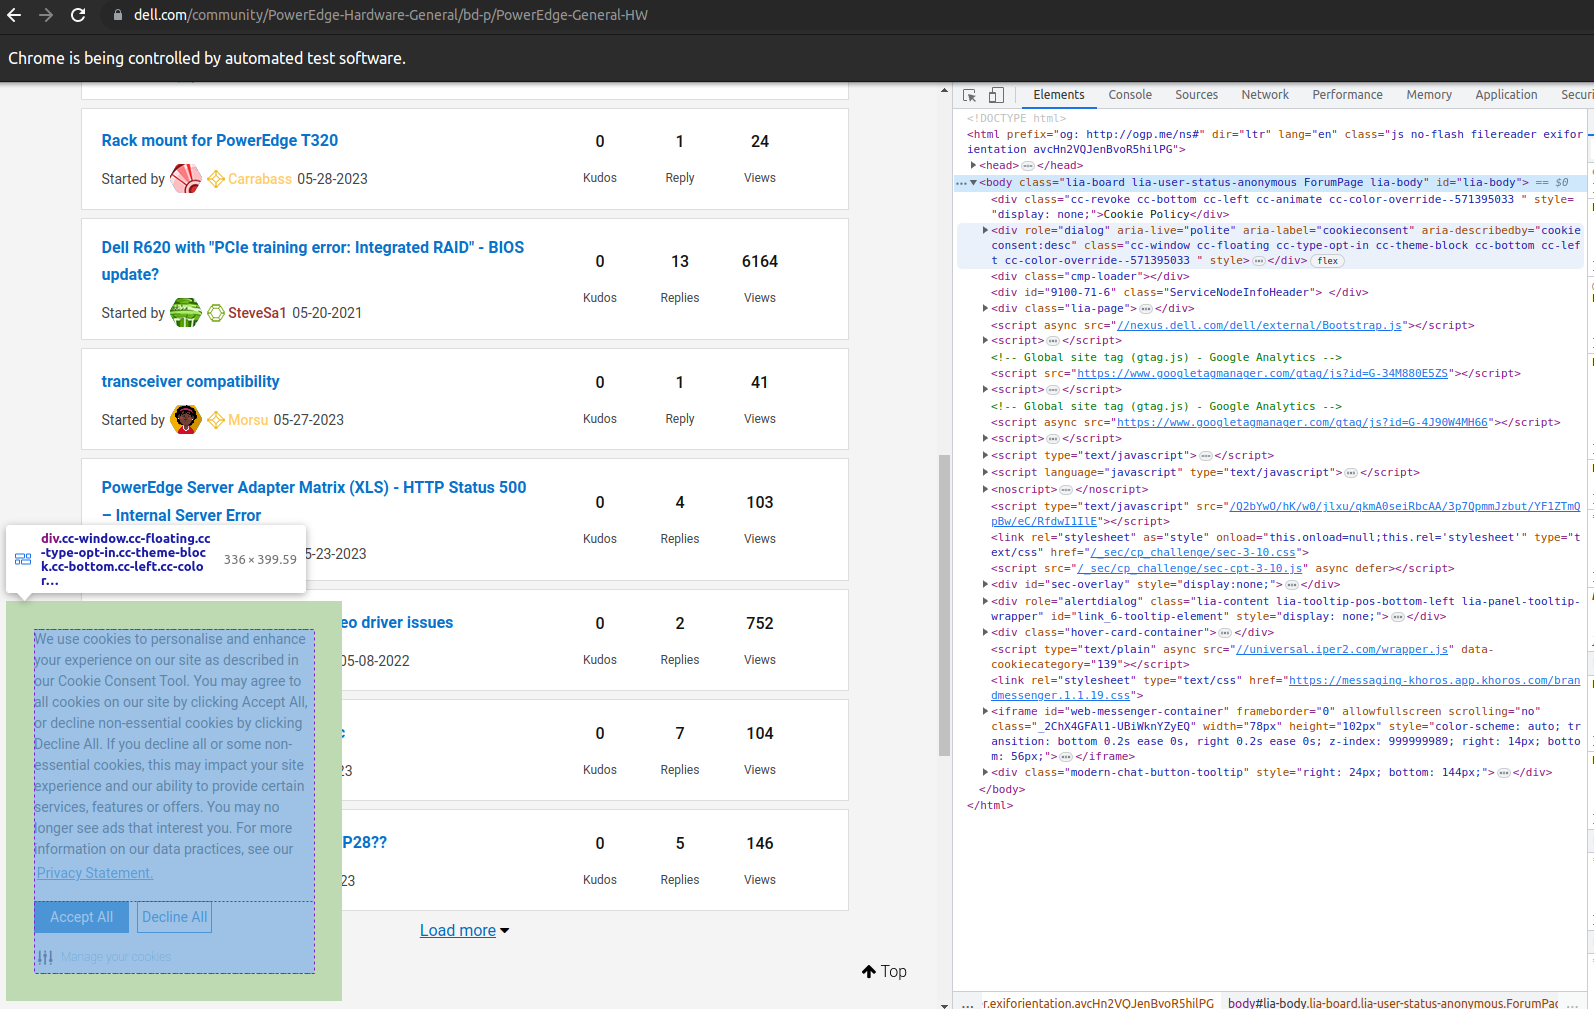





- 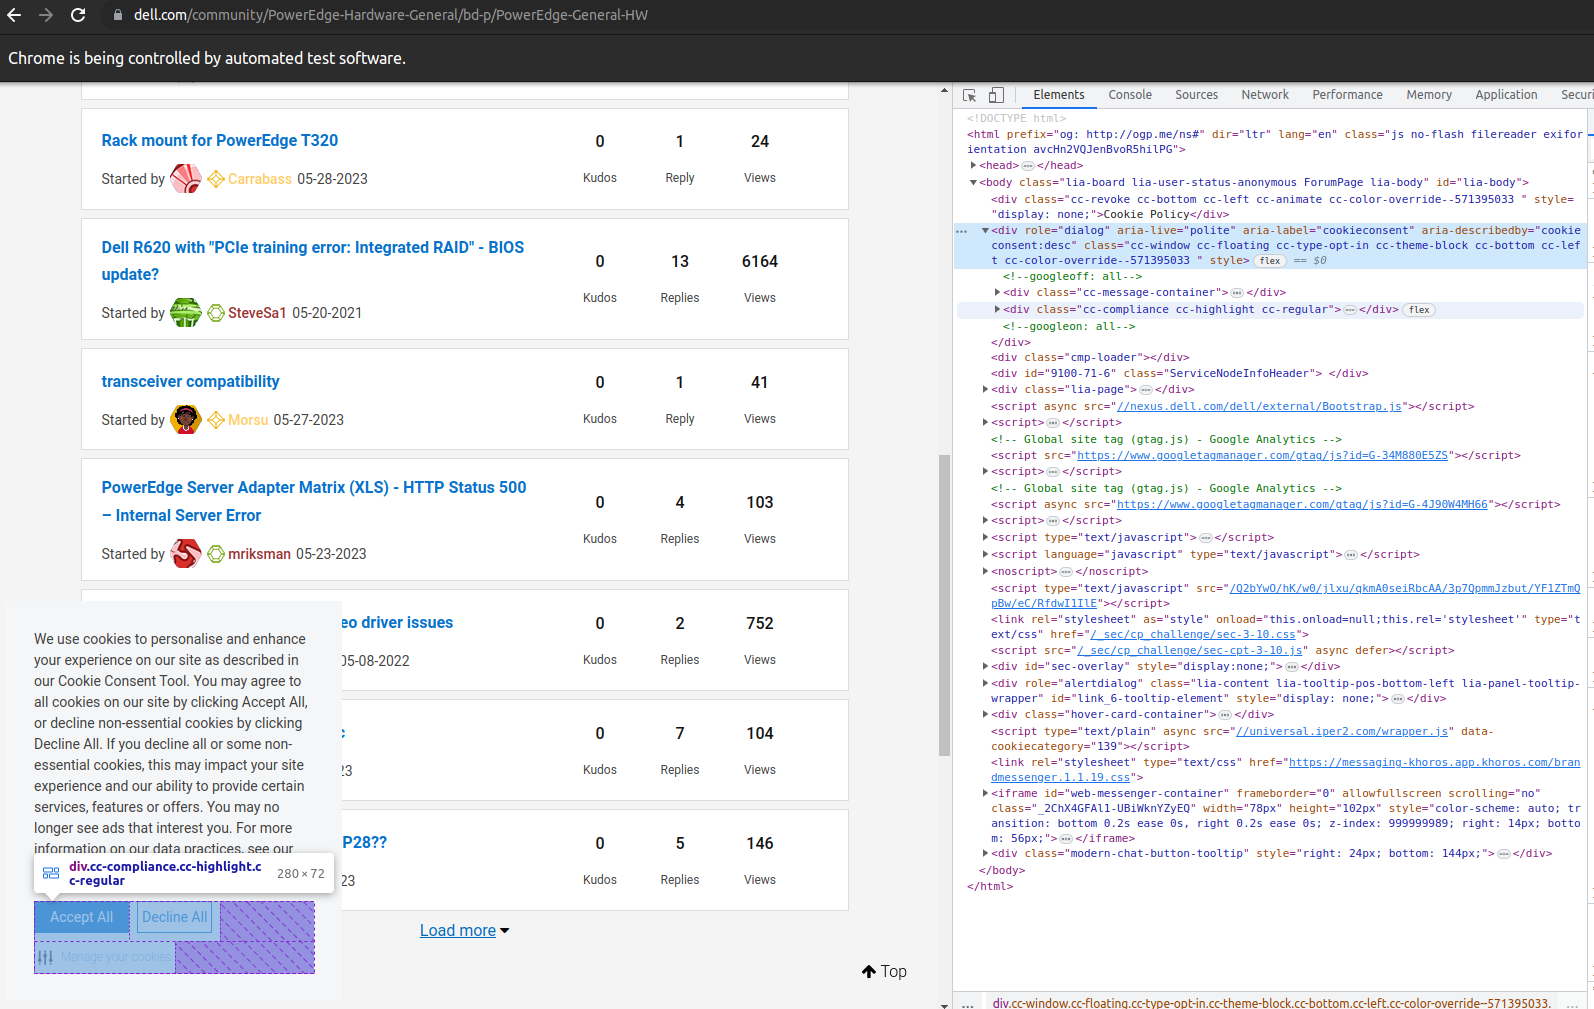
- 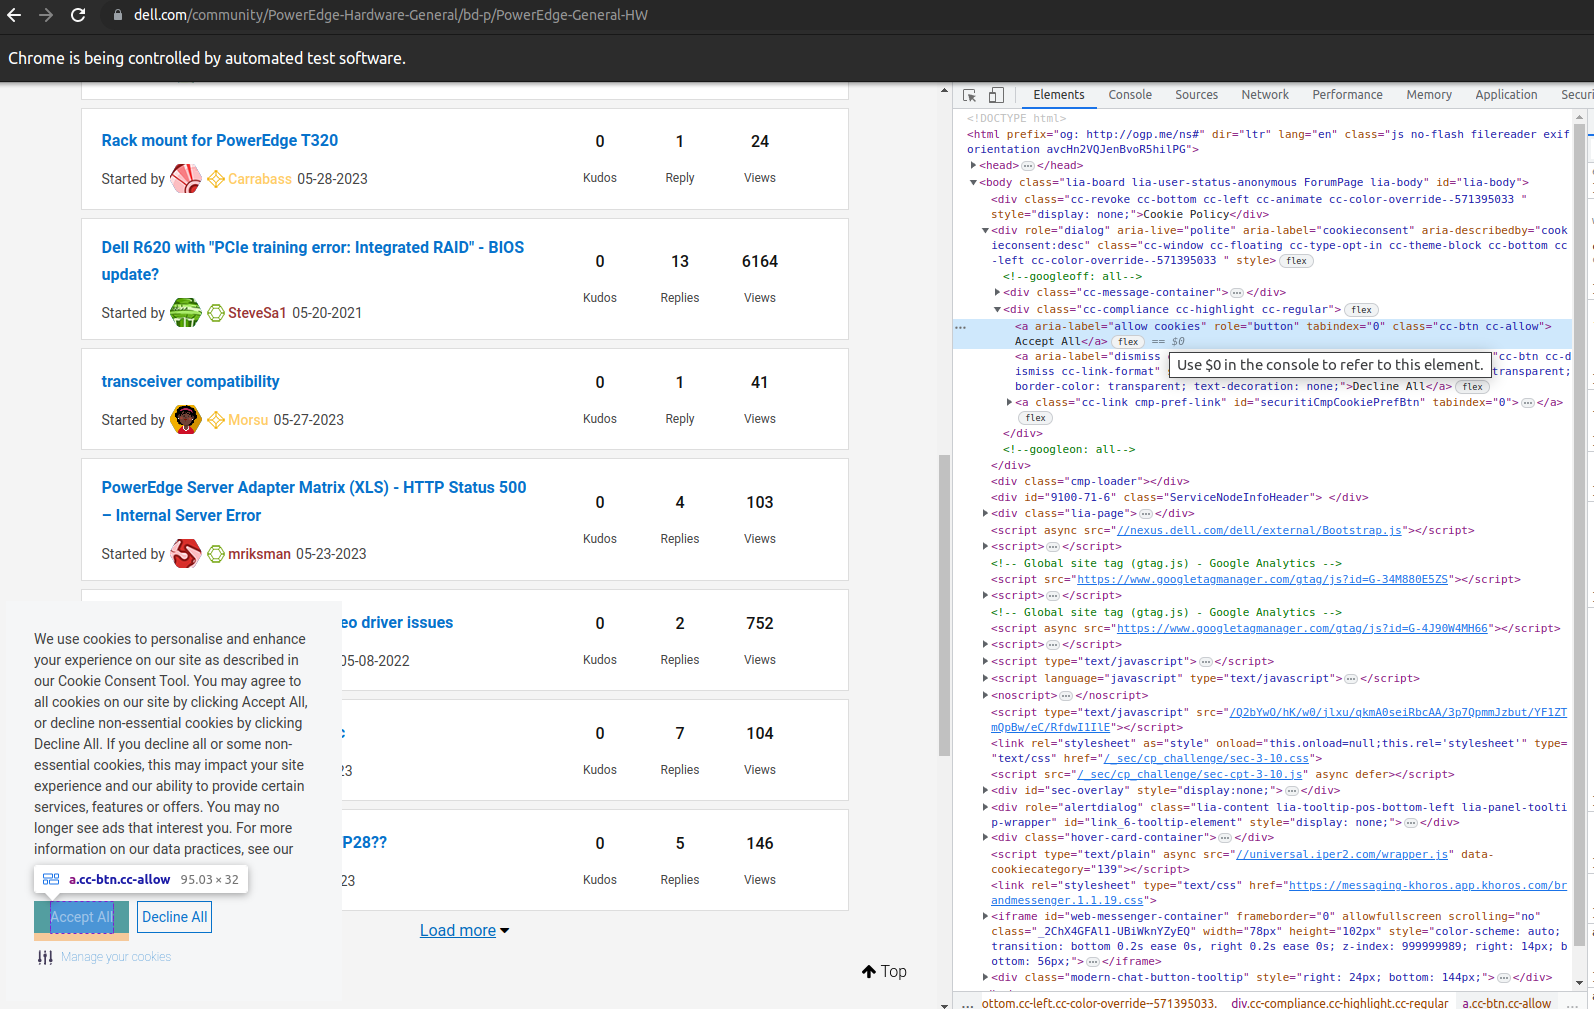

- `<a aria-label="allow cookies" role="button" tabindex="0" class="cc-btn cc-allow">Accept All</a>`

# Selenium vCookie

In [6]:

# Instantiate the Selenium web driver
driver = webdriver.Chrome()

# Navigate to the Dell community forum page
driver.get('https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW')

# Wait for the "load-more-wrapper" button to be clickable
load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, '.load-more-wrapper')))

# Click the "load-more-wrapper" button twice to load more posts
load_more_button.click()
load_more_button.click()

# Wait for the "Allow" button to be clickable
allow_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))

# Click the "Allow" button
allow_button.click()

# Get all href links on the page and print them
links = driver.find_elements(By.XPATH, '//a[@href]')
for link in links:
    print(link.get_attribute('href'))

# Close the Selenium web driver
driver.quit()


ElementClickInterceptedException: Message: element click intercepted: Element is not clickable at point (443, 1957)
  (Session info: chrome=111.0.5563.64)
Stacktrace:
#0 0x55c95dedc243 <unknown>
#1 0x55c95dca07a6 <unknown>
#2 0x55c95dce448f <unknown>
#3 0x55c95dce23e6 <unknown>
#4 0x55c95dcdfc9e <unknown>
#5 0x55c95dcded18 <unknown>
#6 0x55c95dcd2a65 <unknown>
#7 0x55c95dcfe082 <unknown>
#8 0x55c95dcd22e3 <unknown>
#9 0x55c95dcfe24e <unknown>
#10 0x55c95dd16932 <unknown>
#11 0x55c95dcfde53 <unknown>
#12 0x55c95dcd09ea <unknown>
#13 0x55c95dcd1b2e <unknown>
#14 0x55c95df30d5e <unknown>
#15 0x55c95df34a80 <unknown>
#16 0x55c95df168b0 <unknown>
#17 0x55c95df35b63 <unknown>
#18 0x55c95df07f75 <unknown>
#19 0x55c95df58998 <unknown>
#20 0x55c95df58b27 <unknown>
#21 0x55c95df73c23 <unknown>
#22 0x7fad77894b43 <unknown>


The ElementClickInterceptedException occurs when the element you are trying to click is not visible or is covered by another element on the page. In this case, it seems that the "Allow" button is not directly clickable or is being obstructed by another element.

To overcome this issue, you can try using a different approach, such as scrolling to the element and then clicking it. Here's an updated version of the code that incorporates scrolling to the "Allow" button:

The Load More should be `<a id="btn-load-more" href="#" class="lia-link-navigation ">Load more</a>`

# Selenium vCookie_2

In [14]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def automate_dell_forum():
    # Instantiate the Selenium web driver
    driver = webdriver.Chrome()

    # Navigate to the Dell community forum page
    driver.get('https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW')
    
    # full window mode
    driver.maximize_window()


    # Press the "Accept All" button for cookies
    accept_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))
    accept_button.click()

    # Wait for a few seconds before clicking the "Load more" button
    time.sleep(8)

    # Click the "Load more" button twice
    load_more_button = driver.find_element(By.ID, 'btn-load-more')
    load_more_button.click()
    load_more_button.click()

    # Wait for the page to load after clicking "Load more" button
    time.sleep(8)

    # Get all href links on the page and print them
    links = driver.find_elements(By.XPATH, '//a[@href]')
    for link in links:
        print(link.get_attribute('href'))

    # Close the Selenium web driver
    driver.quit()

# Call the method to automate the process
automate_dell_forum()



ElementClickInterceptedException: Message: element click intercepted: Element is not clickable at point (740, 1932)
  (Session info: chrome=111.0.5563.64)
Stacktrace:
#0 0x56515145d243 <unknown>
#1 0x5651512217a6 <unknown>
#2 0x56515126548f <unknown>
#3 0x5651512633e6 <unknown>
#4 0x565151260c9e <unknown>
#5 0x56515125fd18 <unknown>
#6 0x565151253a65 <unknown>
#7 0x56515127f082 <unknown>
#8 0x5651512532e3 <unknown>
#9 0x56515127f24e <unknown>
#10 0x565151297932 <unknown>
#11 0x56515127ee53 <unknown>
#12 0x5651512519ea <unknown>
#13 0x565151252b2e <unknown>
#14 0x5651514b1d5e <unknown>
#15 0x5651514b5a80 <unknown>
#16 0x5651514978b0 <unknown>
#17 0x5651514b6b63 <unknown>
#18 0x565151488f75 <unknown>
#19 0x5651514d9998 <unknown>
#20 0x5651514d9b27 <unknown>
#21 0x5651514f4c23 <unknown>
#22 0x7f8960894b43 <unknown>


```
ElementClickInterceptedException: Message: element click intercepted: Element is not clickable at point (740, 1932)
  (Session info: chrome=111.0.5563.64)
Stacktrace:
#0 0x55fc5012b243 <unknown>
#1 0x55fc4feef7a6 <unknown>
#2 0x55fc4ff3348f <unknown>
```

# Selenium vCookie_3

- using `JavascriptExecutor` to perform the click operation on the "Load more" button


- Also, The `MoveTargetOutOfBoundsException` error can occur when the scroll action goes beyond the bounds of the webpage. To avoid this error, we can try a different approach by scrolling to the bottom of the page using execute_script() and then clicking the "Load more" button.

In [19]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [22]:


def automate_dell_forum():
    # Instantiate the Selenium web driver
    driver = webdriver.Chrome()
    driver.maximize_window()  # Maximize the browser window

    # Navigate to the Dell community forum page
    driver.get('https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW')

    # Press the "Accept All" button for cookies
    accept_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))
    accept_button.click()

    # Scroll to the bottom of the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait for a few seconds before clicking the "Load more" button
    time.sleep(2)

    # Click the "Load more" button twice
    load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'btn-load-more')))
    load_more_button.click()
    load_more_button.click()

    # Wait for the page to load after clicking "Load more" button
    time.sleep(2)

    # Get all href links on the page and print them
    links = driver.find_elements(By.XPATH, '//a[@href]')
    for link in links:
        print(link.get_attribute('href'))

    # Close the Selenium web driver
    driver.quit()

# Call the method to automate the process
automate_dell_forum()

    

https://www.dell.com/learn/IE/en/IEcorp1/policies-privacy
http://www.dell.com/
https://www.delltechnologies.com/
https://www.dell.com/en-us/
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.solutions.href
https://www.dell.com/support/home/?l=en
https://www.dell.com/community/
javascript:void(0)
https://www.dell.com/community/Dell-Community/ct-p/English?profile.language=en
https://www.dell.com/community/Comunidade-da-Dell/ct-p/Portuguese?profile.language=pt
https://www.dell.com/community/Comunidad-de-Dell/ct-p/Spanish?profile.language=es
https://www.dell.com/community/%E6%88%B4%E5%B0%94%E7%A4%BE%E5%8C%BA/ct-p/Chinese?profile.language=zh-CN
https://www.dell.com/community/Communaut%C3%A9-Dell/ct-p/French?profile.language=fr
https://www.dell.com/community/Dell-Gemeinschaft/ct-p/German?profile.language=de
https://www.dell.com/community/%E3%83%87%E3%83%AB%E3%82%B3%E3%83%9F%E3%83%A5%E3%83%8B%E3%83%86%E3%82%A3/ct-p/Japanese?profile.language=ja
https://www.dell.co

## Filter list `links`


- rather than print, will save to `link_list`
- wil LATER param `num_clicks` which indicates the number of times to click the "Load more" button


Remove:


- `https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW` 


Retain links like the links below:

- `https://www.dell.com/community/PowerEdge-Hardware-General/Dell-R820-dedicated-iDRAC-interface-issues/td-p/8396971/jump-to/first-unread-message` 
- `https://www.dell.com/community/PowerEdge-Hardware-General/Unable-to-upgrade-iDRAC-7-from-2-21-21/td-p/8388296/jump-to/first-unread-message`

In [30]:
import time
from selenium import webdriver
# for headless
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [34]:
def automate_dell_forum():
    # Instantiate the Selenium web driver
    driver = webdriver.Chrome()
    driver.maximize_window()  # Maximize the browser window

    # Navigate to the Dell community forum page
    driver.get('https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW')

    # Press the "Accept All" button for cookies
    accept_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))
    accept_button.click()

    # Scroll to the bottom of the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait for a few seconds before clicking the "Load more" button
    time.sleep(2)

    # Click the "Load more" button three times
    load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'btn-load-more')))
    load_more_button.click()
    load_more_button.click()
    load_more_button.click()

    # Wait for the page to load after clicking "Load more" button
    time.sleep(2)

    # Get all href links on the page and save them to a list
    links = driver.find_elements(By.XPATH, '//a[@href]')
    link_list = [link.get_attribute('href') for link in links]

    # Close the Selenium web driver
    driver.quit()

    return link_list

# Call the method to automate the process and get the link list
link_list = automate_dell_forum()

# Print the links
for link in link_list:
    print(link)



https://www.dell.com/learn/IE/en/IEcorp1/policies-privacy
http://www.dell.com/
https://www.delltechnologies.com/
https://www.dell.com/en-us/
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.solutions.href
https://www.dell.com/support/home/?l=en
https://www.dell.com/community/
javascript:void(0)
https://www.dell.com/community/Dell-Community/ct-p/English?profile.language=en
https://www.dell.com/community/Comunidade-da-Dell/ct-p/Portuguese?profile.language=pt
https://www.dell.com/community/Comunidad-de-Dell/ct-p/Spanish?profile.language=es
https://www.dell.com/community/%E6%88%B4%E5%B0%94%E7%A4%BE%E5%8C%BA/ct-p/Chinese?profile.language=zh-CN
https://www.dell.com/community/Communaut%C3%A9-Dell/ct-p/French?profile.language=fr
https://www.dell.com/community/Dell-Gemeinschaft/ct-p/German?profile.language=de
https://www.dell.com/community/%E3%83%87%E3%83%AB%E3%82%B3%E3%83%9F%E3%83%A5%E3%83%8B%E3%83%86%E3%82%A3/ct-p/Japanese?profile.language=ja
https://www.dell.co

In [35]:
len(link_list)

231

# Filtered_List 

In [38]:
def filter_links(link_list):
    filtered_links = []
    exclude_urls = [
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW#',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.solutions.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.careers.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.about.href'
    ]
    for link in link_list:
        if link.startswith('https://www.dell.com/community/PowerEdge-Hardware-General/') and link not in exclude_urls:
            filtered_links.append(link)
    return filtered_links

# Filter the links
filtered_links = filter_links(link_list)

# Print the filtered links
for link in filtered_links:
    print(link)


https://www.dell.com/community/PowerEdge-Hardware-General/DELL-EMC-Support-videos/td-p/7529991/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW
https://www.dell.com/community/PowerEdge-Hardware-General/Configuring-Memory-on-boot-and-that-s-it/td-p/8398511/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW
https://www.dell.com/community/PowerEdge-Hardware-General/PowerEdge-R730-SEC0033-Intrusion-detected-check-chasis-cover/td-p/8398950/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW
https://www.dell.com/community/PowerEdge-Hardware-General/Unable-to-upgrade-iDRAC-7-from-2-21-21/td-p/8388296/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW
https://www.dell.com/community/PowerEdge-Hardware-General/Rack-mount-for-PowerEdge-T320/td-p/839874

In [40]:
len(filtered_links)

82

# Filter webpage by `Solved` cases

- lets go back and adjust method, to click Filter by Solved first
- 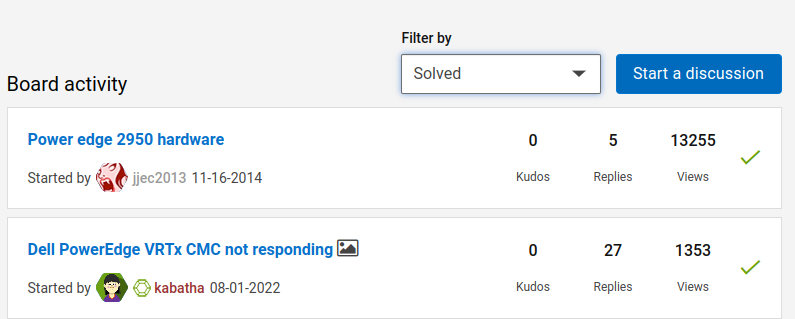

- Right click and `Inspect Element`
- 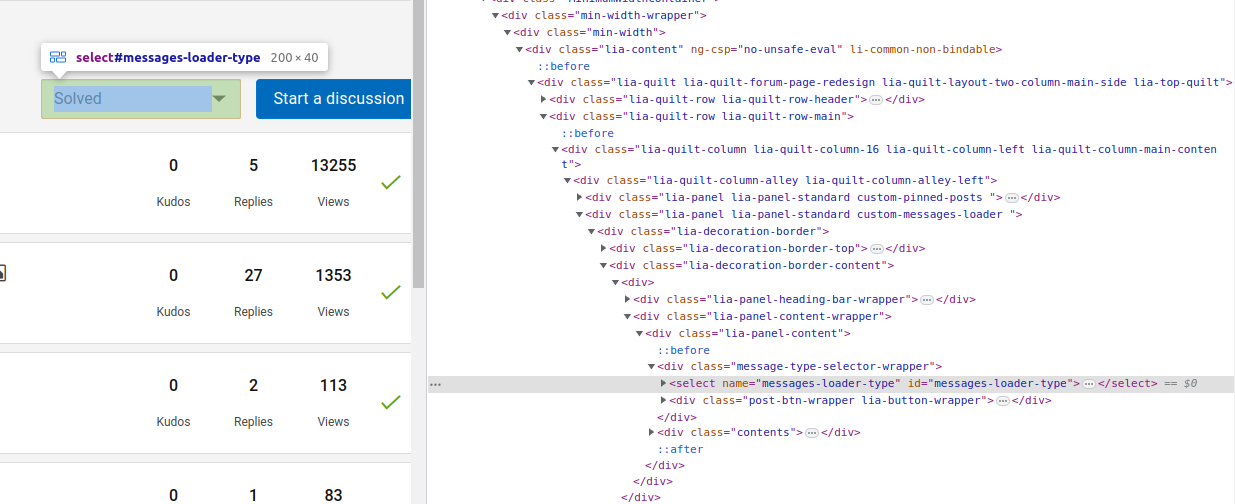

- `<select name="messages-loader-type" id="messages-loader-type"> <option value="recent" selected="">Latest activity</option> <option value="solved">Solved</option> <option value="topkudos">Kudoed</option> </select>`
- `<option value="solved">Solved</option>`


```
    # Select the "Solved" option from the dropdown
    select_element = driver.find_element(By.ID, 'messages-loader-type')
    option_solved = select_element.find_element(By.XPATH, "//option[@value='solved']")
    option_solved.click()
    
```

In [49]:
def automate_dell_forum():
    # Instantiate the Selenium web driver
    driver = webdriver.Chrome()
    driver.maximize_window()  # Maximize the browser window

    # Navigate to the Dell community forum page
    driver.get('https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW')

    # Press the "Accept All" button for cookies
    accept_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))
    accept_button.click()
    
    # Select the "Solved" option from the dropdown
    select_element = driver.find_element(By.ID, 'messages-loader-type')
    option_solved = select_element.find_element(By.XPATH, "//option[@value='solved']")
    option_solved.click()

    # Wait for the page to load after selecting "Solved" option
    time.sleep(2)

    # Scroll to the bottom of the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait for a few seconds before clicking the "Load more" button
    time.sleep(2)

    # Click the "Load more" button three times
    load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'btn-load-more')))
    load_more_button.click()
    load_more_button.click()
    load_more_button.click()
    load_more_button.click()

    # Wait for the page to load after clicking "Load more" button
    time.sleep(2)

    # Get all href links on the page and save them to a list
    links = driver.find_elements(By.XPATH, '//a[@href]')
    link_list = [link.get_attribute('href') for link in links]

    # Close the Selenium web driver
    driver.quit()

    return link_list

# Call the method to automate the process and get the link list
link_list = automate_dell_forum()

# Print the links
for link in link_list:
    print(link)

   

https://www.dell.com/learn/IE/en/IEcorp1/policies-privacy
http://www.dell.com/
https://www.delltechnologies.com/
https://www.dell.com/en-us/
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.solutions.href
https://www.dell.com/support/home/?l=en
https://www.dell.com/community/
javascript:void(0)
https://www.dell.com/community/Dell-Community/ct-p/English?profile.language=en
https://www.dell.com/community/Comunidade-da-Dell/ct-p/Portuguese?profile.language=pt
https://www.dell.com/community/Comunidad-de-Dell/ct-p/Spanish?profile.language=es
https://www.dell.com/community/%E6%88%B4%E5%B0%94%E7%A4%BE%E5%8C%BA/ct-p/Chinese?profile.language=zh-CN
https://www.dell.com/community/Communaut%C3%A9-Dell/ct-p/French?profile.language=fr
https://www.dell.com/community/Dell-Gemeinschaft/ct-p/German?profile.language=de
https://www.dell.com/community/%E3%83%87%E3%83%AB%E3%82%B3%E3%83%9F%E3%83%A5%E3%83%8B%E3%83%86%E3%82%A3/ct-p/Japanese?profile.language=ja
https://www.dell.co

In [48]:
len(link_list)

231

In [50]:
len(link_list)

271

# Filtered Solved List

In [64]:
def filter__solved_links(link_list):
    filtered_solved_links = []
    exclude_urls = [
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW#',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.solutions.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.careers.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.about.href'
    ]
    for link in link_list:
        if link.startswith('https://www.dell.com/community/PowerEdge-Hardware-General/') and link not in exclude_urls:
            filtered_solved_links.append(link)
    return filtered_solved_links

# Filter the links
filtered_solved_links = filter_links(link_list)

# Print the filtered links
for link in filtered_solved_links:
    print(link)


https://www.dell.com/community/PowerEdge-Hardware-General/DELL-EMC-Support-videos/td-p/7529991/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW
https://www.dell.com/community/PowerEdge-Hardware-General/Power-edge-2950-hardware/td-p/4480797/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW
https://www.dell.com/community/PowerEdge-Hardware-General/Dell-PowerEdge-VRTx-CMC-not-responding/td-p/8244237/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW
https://www.dell.com/community/PowerEdge-Hardware-General/Dell-FN410s-SSH-Key-Exchange/td-p/8397484/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW
https://www.dell.com/community/PowerEdge-Hardware-General/TPM-2-0-Part-Number-for-R730/td-p/8397430/jump-to/first-unread-message
https://www.dell.c

# Next, will go into each webpage and jump to Solution post


- save first post as `question`
- save Solution post as `answer`

- 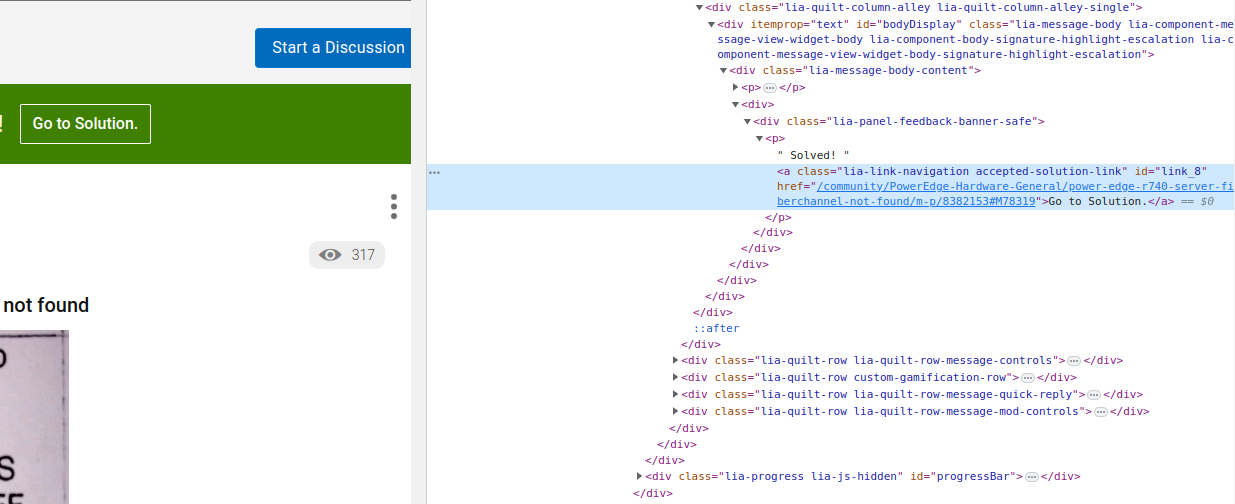

1. Copy text from First POst (question) 

    - 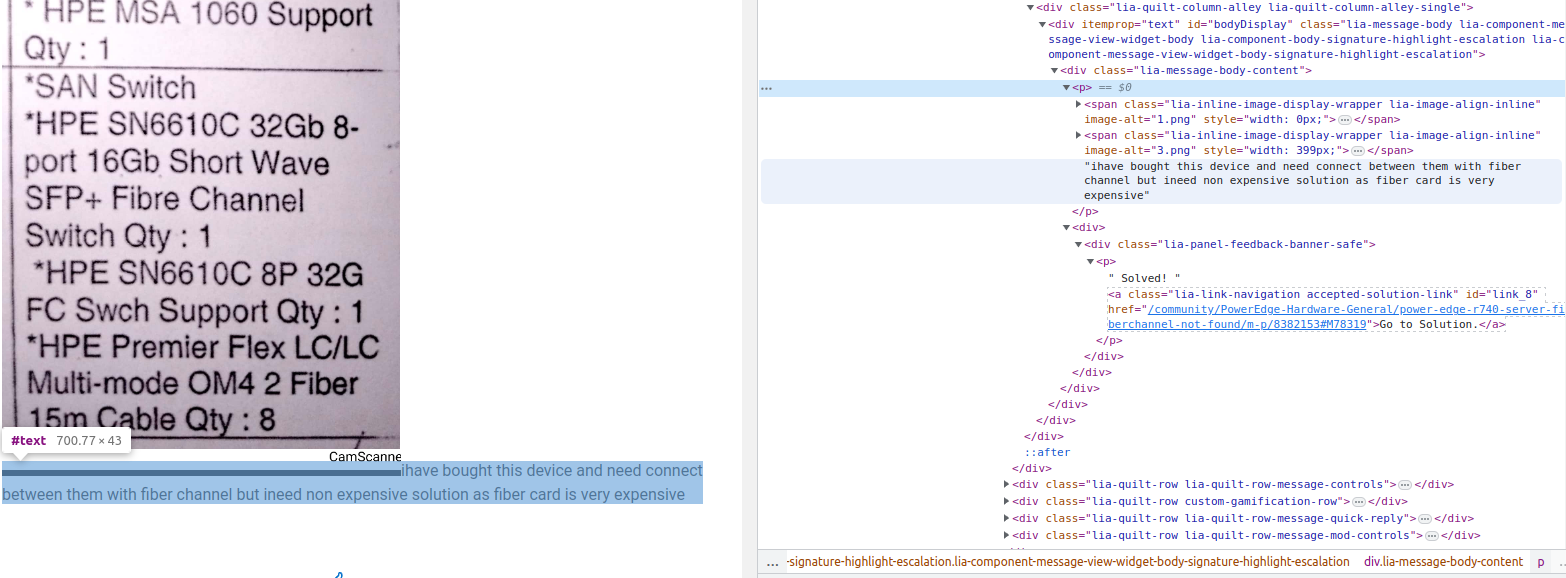


2. JUmp to Solution POst (answer)


    - `<a class="lia-link-navigation accepted-solution-link" id="link_8" href="/community/PowerEdge-Hardware-General/power-edge-r740-server-fiberchannel-not-found/m-p/8382153#M78319">Go to Solution.</a>`


3. Copy Solution post text (answer)

4. CSV (question | answer)


None



## Question Test

```
<div class="lia-message-subject">
							dell R740 won't initialise 7.68tb dell emc  MZ-ILT7T6A /?
						</div>
```

URL: https://www.dell.com/community/PowerEdge-Hardware-General/dell-R740-won-t-initialise-7-68tb-dell-emc-MZ-ILT7T6A/m-p/8386289#M78445



In [54]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

def extract_text_from_div():
    # Set up the Selenium Chrome driver
    options = Options()
    options.add_argument('--headless')  # Run in headless mode to avoid opening a browser window
    service = Service('path_to_chromedriver')  # Replace 'path_to_chromedriver' with the actual path
    driver = webdriver.Chrome(service=service, options=options)
    driver.maximize_window()

    # Navigate to the specified URL
    url = "https://www.dell.com/community/PowerEdge-Hardware-General/dell-R740-won-t-initialise-7-68tb-dell-emc-MZ-ILT7T6A/m-p/8386289#M78445"
    driver.get(url)
    
    # Press the "Accept All" button for cookies
    accept_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))
    accept_button.click()

    # Find the target element using its class name
    element = driver.find_element(By.CLASS_NAME, 'lia-message-subject')

    # Extract the text from the element
    extracted_text = element.text.strip()

    # Print the extracted text
    print(extracted_text)

    # Close the Selenium web driver
    driver.quit()

# Call the method to extract and print the text
extract_text_from_div()


dell R740 won't initialise 7.68tb dell emc MZ-ILT7T6A /?


# Question test 2 (using list of URLs)



In [66]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

def extract_text_from_div(filtered_links):
    # Set up the Selenium Chrome driver
    options = Options()
    options.add_argument('--headless')  # Run in headless mode to avoid opening a browser window
    service = Service('path_to_chromedriver')  # Replace 'path_to_chromedriver' with the actual path
    driver = webdriver.Chrome(service=service, options=options)
    driver.maximize_window()

    # Iterate through the filtered_links
    for url in filtered_solved_links:
        # Navigate to the URL
        driver.get(url)
        
        # Press the "Accept All" button for cookies
        accept_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))
        accept_button.click()

        # Find the target element using its class name
        element = driver.find_element(By.CLASS_NAME, 'lia-message-subject')

        # Extract the text from the element
        extracted_text = element.text.strip()

        # Print the extracted text
        print(extracted_text)

    # Close the Selenium web driver
    driver.quit()

# List of Solved filtered links from above
filtered_solved_links

# Call the method to extract and print the text from the filtered links
extract_text_from_div(filtered_links)


DELL EMC Support videos


TimeoutException: Message: 
Stacktrace:
#0 0x55818e15d243 <unknown>
#1 0x55818df217a6 <unknown>
#2 0x55818df5e64d <unknown>
#3 0x55818df5e761 <unknown>
#4 0x55818df99da4 <unknown>
#5 0x55818df7f0ad <unknown>
#6 0x55818df97932 <unknown>
#7 0x55818df7ee53 <unknown>
#8 0x55818df519ea <unknown>
#9 0x55818df52b2e <unknown>
#10 0x55818e1b1d5e <unknown>
#11 0x55818e1b5a80 <unknown>
#12 0x55818e1978b0 <unknown>
#13 0x55818e1b6b63 <unknown>
#14 0x55818e188f75 <unknown>
#15 0x55818e1d9998 <unknown>
#16 0x55818e1d9b27 <unknown>
#17 0x55818e1f4c23 <unknown>
#18 0x7f1c0ce94b43 <unknown>


In [67]:
len(filtered_solved_links)

102

Lets look at first URL from list `https://www.dell.com/community/PowerEdge-Hardware-General/DELL-EMC-Support-videos/td-p/7529991/jump-to/first-unread-message`